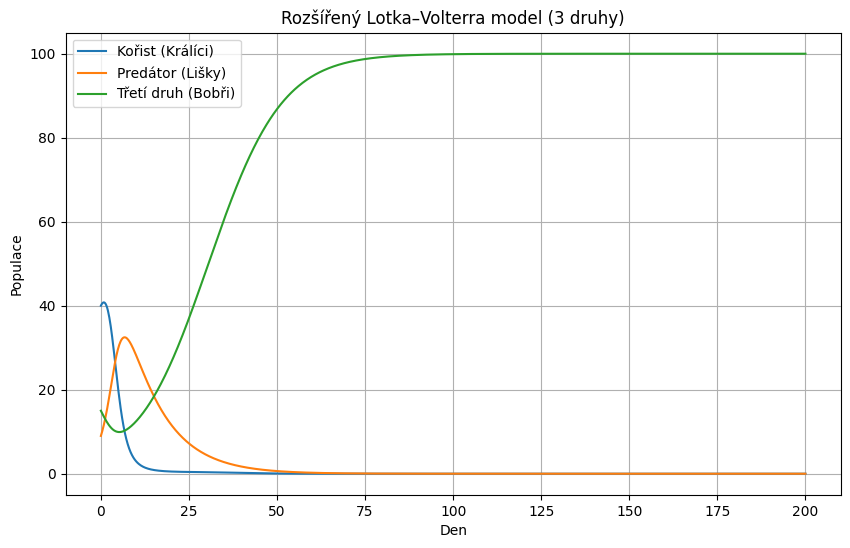

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def LV_model_ext(
    vars,
    t,
    rust_koristi,
    ucinnost_lovu,
    umrtnost_predatoru,
    rust_predatoru,
    utlum_koristi,
    rustova_konstanta,
    nosna_kapacita,
    utlum_noveho_druhu,
):
    x, y, z = vars
    # dx/dt = růst - predace - konkurence
    dxdt = (rust_koristi * x) - (ucinnost_lovu * x * y) - (utlum_koristi * x * z)
    # dy/dt = růst díky kořisti - úmrtnost
    dydt = (rust_predatoru * x * y) - (umrtnost_predatoru * y)
    # dz/dt = logistický růst - útlum konkurencí
    dzdt = rustova_konstanta * z * (1 - z / nosna_kapacita) - (
        utlum_noveho_druhu * x * z
    )
    return [dxdt, dydt, dzdt]


def solution_graph(title, prey, predator, extra_species):
    # Řešení
    solution = odeint(
        LV_model_ext,
        init_param,
        t,
        args=(
            rust_koristi,
            ucinnost_lovu,
            umrtnost_predatoru,
            rust_predatoru,
            utlum_koristi,
            rustova_konstanta,
            nosna_kapacita,
            utlum_noveho_druhu,
        ),
    )
    x, y, z = solution.T  # rozdělí na jednotlivé vektory

    # Graf
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label=f"Kořist ({prey})")
    plt.plot(t, y, label=f"Predátor ({predator})")
    plt.plot(t, z, label=f"Třetí druh ({extra_species})")
    plt.xlabel("Den")
    plt.ylabel("Populace")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


# Počáteční podmínky
x0 = 40  # Kořist - králíci
y0 = 9  # Predátoři - lišky
z0 = 15  # Třetí druh - bobři (konkurenti králíkům)
init_param = [x0, y0, z0]

# Parametry
rust_koristi = 0.3
ucinnost_lovu = 0.02
umrtnost_predatoru = 0.1
rust_predatoru = 0.01  # díky lovu
utlum_koristi = 0.005  # novým druhem
rustova_konstanta = 0.1  # nového druhu
nosna_kapacita = 100  # prostředí
utlum_noveho_druhu = 0.006  # při konkurenci s kořistí

# Časová osa
t = np.linspace(0, 200, 1000)

solution_graph(
    title="Rozšířený Lotka–Volterra model (3 druhy)",
    prey="Králíci",
    predator="Lišky",
    extra_species="Bobři",
)
